Lab | Customer Analysis Round 7
For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise. Some approaches you can try in this exercise:

- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution
- Get the data
- We are using the marketing_customer_analysis.csv file.

1. Dealing with the data
Already done in rounds 2 to 7.

Bonus: Build a function, from round 2 and round 7, to clean and process the data.

2. Explore the data
Done in the round 3.

3. Modeling
Description:

Try to improve the linear regression model.

In [4]:
import pandas as pd
df=pd.read_csv(r"C:\Users\usuario\Desktop\Ironhacks\marketing_customer_analysis.csv")
df=df.dropna()
numericos=df.select_dtypes(include=["int64", "float64"])
categoricos=df.select_dtypes(exclude=["int64", "float64"])
correlaciones=numericos.corr()
correlaciones
x = df.drop(columns="Customer Lifetime Value") # Cojo todo menos customer lifetime value
y = df["Customer Lifetime Value"] # Cojo solo customer lifetime value
from sklearn.preprocessing import MinMaxScaler #Has de importar esta libreria para normalizar
scaler=MinMaxScaler()
nomalized_df=scaler.fit_transform(df.select_dtypes(include=["int64", "float64"]))
response_code = pd.get_dummies(categoricos['Coverage'])  # los categoricos ya los definiste antes
# Concatenar las nuevas columnas codificadas con el DataFrame original
categoricos= pd.concat([categoricos, response_code], axis=1)
# Eliminar la columna original de la categoría, ya que ya está codificada
categoricos.drop('Coverage', axis=1, inplace=True)
# Mostrar el DataFrame resultante
print(categoricos)
from sklearn.preprocessing import LabelEncoder

#Este objeto se utiliza para transformar etiquetas categóricas en números 
# --> útil en preprocesamiento de datos para algoritmos de aprendizaje automático.
label_encoder = LabelEncoder()

# Aplicamos el Label Encoding a las etiquetas
    #El objeto LabelEncoder codifica una columna específica llamada "Marital Status" de un DataFrame categoricos1:
categoricos["Marital Status"] = label_encoder.fit_transform(categoricos["Marital Status"])
# Creamos una instancia del LabelEncoder y lo ajustamos a las etiquetas originales
codificaciones = label_encoder.fit_transform(df["Marital Status"])
# Obtenemos las categorías originales
categorias_originales = label_encoder.classes_
categorias_originales

     Customer       State Response Education Effective To Date  \
0     BU79786  Washington       No  Bachelor           2/24/11   
1     QZ44356     Arizona       No  Bachelor           1/31/11   
2     AI49188      Nevada       No  Bachelor           2/19/11   
3     WW63253  California       No  Bachelor           1/20/11   
4     HB64268  Washington       No  Bachelor            2/3/11   
...       ...         ...      ...       ...               ...   
9129  LA72316  California       No  Bachelor           2/10/11   
9130  PK87824  California      Yes   College           2/12/11   
9131  TD14365  California       No  Bachelor            2/6/11   
9132  UP19263  California       No   College            2/3/11   
9133  Y167826  California       No   College           2/14/11   

     EmploymentStatus Gender Location Code Marital Status     Policy Type  \
0            Employed      F      Suburban        Married  Corporate Auto   
1          Unemployed      F      Suburban         Si

array(['Divorced', 'Married', 'Single'], dtype=object)

In [5]:
x=x[["Income", "Monthly Premium Auto", "Months Since Last Claim", "Months Since Policy Inception", "Number of Open Complaints", "Number of Policies", "Total Claim Amount"]]

In [6]:
# Ahora intentamos analizar colinearity con VIF:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Añadir una columna constante al DataFrame para el término de intercepción
# x = add_constant(numericos)
# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(7)]

# Imprimir el DataFrame con los resultados del VIF
print(vif_data)

                        Variable        VIF
0                         Income   2.829624
1           Monthly Premium Auto  12.406466
2        Months Since Last Claim   2.784210
3  Months Since Policy Inception   3.267690
4      Number of Open Complaints   1.165267
5             Number of Policies   2.296918
6             Total Claim Amount   6.664016


In [7]:
numericos

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [8]:
# Segun los resuktados, VIF>5 --> multicolinearity y debes eliminar
x1=x[["Income", "Months Since Last Claim", "Months Since Policy Inception", "Number of Open Complaints", "Number of Policies", "Total Claim Amount"]]

In [9]:
from sklearn.model_selection import train_test_split
# Problema: dentro de x hay vbles categoricas asi que vamos a definir x1 DF sin categoricos:
x1=x.select_dtypes(exclude=["object"])
# Dividir los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%)
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)
# x (vble indep), y (vble dep)
#test_size (tamaño del conjunto d eprueba, ahora 20%)
#random_state(semilla para garantizar que la división sea reproducible. Puedes cambiar este valor o dejarlo en None.)
# Para entrenar el modelo:
from sklearn.linear_model import LinearRegression
# Paso 2: Instancia el modelo
modelo = LinearRegression()

# Paso 3: Entrena el modelo
modelo.fit(x1_train, y_train)

# Ahora el modelo ha sido entrenado en los datos de entrenamiento

coef_regresion=modelo.coef_[0] #corte en abcisas
pendiente=modelo.intercept_
y_pred = modelo.predict(x1)

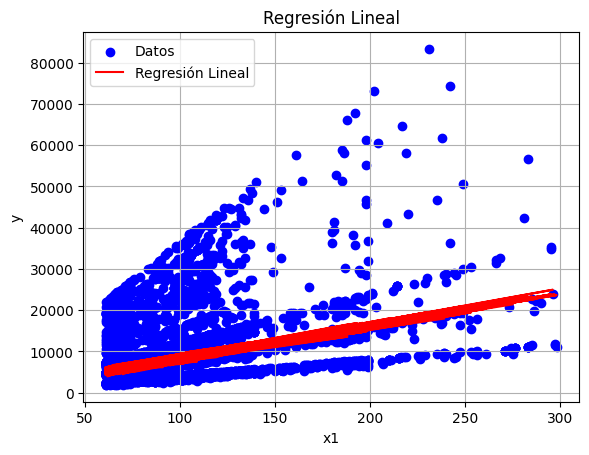

In [10]:
import matplotlib.pyplot as plt
# Scatter plot de los datos
plt.scatter(x1["Monthly Premium Auto"], y, color='blue', label='Datos')  

# Trazar la línea de regresión
plt.plot(x1["Monthly Premium Auto"], y_pred, color='red', label='Regresión Lineal')  

plt.xlabel('x1')  # Etiqueta del eje x
plt.ylabel('y')  # Etiqueta del eje y
plt.title('Regresión Lineal')  # Título del gráfico
plt.grid(True)  # Mostrar cuadrícula
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar gráfico

In [11]:
# 11. Model Validation. Description:
    # 11.1. R2:
from sklearn.metrics import r2_score

# Supongamos que tienes tus datos de predicción y de verdad
# y_pred = ...
# y_true = ...

# Calcular el R cuadrado
r_cuadrado = r2_score(y, y_pred)

print("R cuadrado del modelo:", r_cuadrado)
# El R cuadrado varía entre 0-1 (nula-total explicacion de la varibilidad). 
# R cuadrado no es una medida perfecta de la bondad del ajuste de un modelo. 
#Puede ser engañoso. Por lo tanto, es recomendable complementar el analisis con otras métricas de evaluación como:
#error cuadrático medio (MSE), error absoluto medio (MAE)para obtener una imagen más completa del rendimiento del modelo.

R cuadrado del modelo: 0.16004618789227099


In [12]:
# 11.2. MSE --> error cuadrático medio
from sklearn.metrics import mean_squared_error
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y, y_pred)
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 39650042.59165002


In [13]:
import numpy as np
# 11.3. RMSE --> MRoot Mean Squared Error
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 6296.827978565876


In [14]:
from sklearn.metrics import mean_absolute_error
# 11.4. MAE --> Mean Absolut error
mae = mean_absolute_error(y, y_pred)
print("MAE:", mae)

MAE: 3905.17051077059
